<h1><u> IDS Final Project: </u> </h1>
<center><img src="datascience.jpg"></center>
<ol>
    <li> Abhishek Patil </li>
    <li> Manthan B Y </li>
    <li> Monish Prakashan </li>
</ol>

### Importing the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

### Reading the CSV file and storing in a pandas DataFrame

In [2]:
df = pd.read_csv("IMDB-Movie-Data.csv").set_index("Rank")

In [3]:
df.head(5)  #Printing first 5 rows of the dataset

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
df.describe() #Getting Summary of the numerical variables

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Cleaning the DataSet

<img src="data-cleaning.png">
<h4> <i> Converting the categorical comma seperated multiple values into the list </i> </h4>

In [5]:
for i in range(1,1001):
    df.at[i, "Genre"] = df.at[i, "Genre"].split(",")
    df.at[i, "Actors"] = df.at[i, "Actors"].split(",")
    #df["Genre"][i] = df["Genre"][i].split(",")

In [6]:
df

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,"[Chris Pratt, Vin Diesel, Bradley Cooper, Z...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"[Adventure, Mystery, Sci-Fi]","Following clues to the origin of mankind, a te...",Ridley Scott,"[Noomi Rapace, Logan Marshall-Green, Michael...",2012,124,7.0,485820,126.46,65.0
3,Split,"[Horror, Thriller]",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"[James McAvoy, Anya Taylor-Joy, Haley Lu Ric...",2016,117,7.3,157606,138.12,62.0
4,Sing,"[Animation, Comedy, Family]","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"[Matthew McConaughey, Reese Witherspoon, Seth...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"[Action, Adventure, Fantasy]",A secret government agency recruits some of th...,David Ayer,"[Will Smith, Jared Leto, Margot Robbie, Vio...",2016,123,6.2,393727,325.02,40.0
6,The Great Wall,"[Action, Adventure, Fantasy]",European mercenaries searching for black powde...,Yimou Zhang,"[Matt Damon, Tian Jing, Willem Dafoe, Andy ...",2016,103,6.1,56036,45.13,42.0
7,La La Land,"[Comedy, Drama, Music]",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"[Ryan Gosling, Emma Stone, Rosemarie DeWitt,...",2016,128,8.3,258682,151.06,93.0
8,Mindhorn,[Comedy],A has-been actor best known for playing the ti...,Sean Foley,"[Essie Davis, Andrea Riseborough, Julian Bar...",2016,89,6.4,2490,NaN,71.0
9,The Lost City of Z,"[Action, Adventure, Biography]","A true-life drama, centering on British explor...",James Gray,"[Charlie Hunnam, Robert Pattinson, Sienna Mi...",2016,141,7.1,7188,8.01,78.0


<h4> <i> Checking for any duplicate values </i> </h4>

In [7]:
ids = df["Title"]

In [8]:
df[ids.isin(ids[ids.duplicated()])]

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
240,The Host,"[Action, Adventure, Romance]",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"[Saoirse Ronan, Max Irons, Jake Abel, Diane...",2013,125,5.9,96852,26.62,35.0
633,The Host,"[Comedy, Drama, Horror]",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"[Kang-ho Song, Hee-Bong Byun, Hae-il Park, ...",2006,120,7.0,73491,2.20,85.0


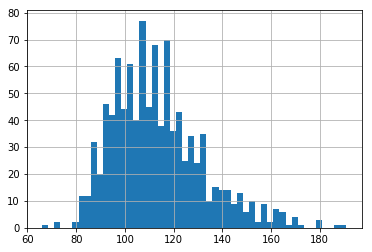

In [9]:
df["Runtime (Minutes)"].hist(bins = 50)

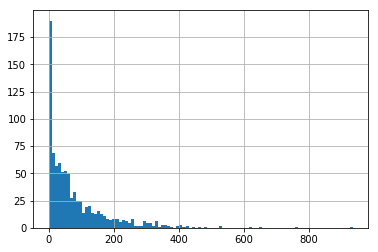

In [12]:
df["Revenue (Millions)"].hist(bins = 100)

In [66]:
.df["Runtime (Minutes)"].value_counts()

108    31
100    28
117    27
110    26
106    26
118    26
102    25
112    24
104    23
123    23
92     22
98     22
95     22
101    22
113    22
111    22
97     22
115    21
107    20
94     20
109    19
120    19
96     19
105    17
119    17
114    17
116    17
99     16
88     15
124    14
       ..
150     4
151     4
153     4
135     4
157     3
147     3
180     3
169     3
142     3
162     3
161     3
84      3
152     2
80      2
149     2
73      2
154     2
156     2
82      1
191     1
187     1
145     1
159     1
160     1
163     1
164     1
166     1
170     1
172     1
66      1
Name: Runtime (Minutes), Length: 94, dtype: int64